# 準備

In [3]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_style(style='ticks') 

In [4]:
# 直径と平均距離の下界を計算
def lb(nnodes, degree):
	diam = -1
	aspl = 0.0
	n = 1
	r = 1
	while True:
		tmp = n + degree * pow(degree - 1, r - 1)
		if tmp >= nnodes:
			break
		n = tmp
		aspl += r * degree * pow(degree - 1, r - 1)
		diam = r
		r += 1
	diam += 1
	aspl += diam * (nnodes - n)
	aspl /= (nnodes - 1)
	return diam, aspl

In [5]:
import json
def load_json(path):
	with open(path, 'r') as f:
		data = json.load(f)
	return data

# データ読み込み

In [6]:
years = [2015, 2016, 2017, 2018]

In [15]:
a = []
feat_keys = []
columns = ['key', 'order', 'degree', 'reach', 'lattice', 'year']
for yr in years:
    data = load_json(f"./data/featured-{yr}.json")
    for n, d in data['general']:
        assert n > d
        k = f"n{n}d{d}"
        a.append({'key': k, 'order': n, 'degree': d, 'reach': -1, 'lattice': None, 'year': yr})
        feat_keys.append(k)
    if 'lattice' not in data:
        continue
    for x, y, d, r in data['lattice']:
        n = x * y
        l = [x, y, d, r]
        k = f"n{x}x{y}d{d}r{r}"
        a.append({'key': k, 'order': n, 'degree': d, 'reach': r, 'lattice': l, 'year': yr})
        feat_keys.append(k)
feat = pd.io.json.json_normalize(a)[columns]
feat

,key,order,degree,reach,lattice,year
0,n16d3,16,3,-1,None,2015
1,n16d4,16,4,-1,None,2015
2,n64d3,64,3,-1,None,2015
3,n64d4,64,4,-1,None,2015
4,n64d16,64,16,-1,None,2015
5,n256d3,256,3,-1,None,2015
6,n256d4,256,4,-1,None,2015
7,n256d16,256,16,-1,None,2015
8,n256d23,256,23,-1,None,2015
9,n4096d3,4096,3,-1,None,2015


In [22]:
columns = ['key', 'order', 'degree', 'reach', 'lattice', 'score', 'diam', 'aspl', 'diam_lb', 'aspl_lb', 'diam_gap', 'aspl_gap', 'year', 'nominated', 'author']
dfs = []
for yr in years:
    data = load_json(f"./data/solutions-{yr}.json")
    for key in data:
        for e in data[key]:
            e['score'] = 1000000 * e['diam'] + e['aspl']
            diam_lb, aspl_lb = lb(e['order'], e['degree'])
            e['diam_lb'] = diam_lb
            e['aspl_lb'] = aspl_lb
            e['year'] = yr
            e.setdefault('reach', -1)
            e.setdefault('lattice', None)
            e.setdefault('nominated', False)
            if e['diam'] != 9999:
                assert e['diam_gap'] == e['diam'] - e['diam_lb']
                assert e['aspl_gap'] == e['aspl'] - e['aspl_lb']
            if e['lattice']:
                if len(e['lattice']) == 3:
                    n = int(math.sqrt(e['lattice'][0]))
                    d = e['lattice'][1]
                    r = e['lattice'][2]
                    e['lattice'] = [n, n, d, r]
                    assert key == f"n{e['order']}d{e['degree']}r{e['reach']}"
                else:
                    assert key == f"n{e['lattice'][0]}x{e['lattice'][1]}d{e['degree']}r{e['reach']}"
                assert e['order'] == e['lattice'][0] * e['lattice'][1]
                assert e['degree'] <= e['lattice'][2]
                assert e['reach'] == e['lattice'][3]
                # 次数が指定より小さいのが2件あるが、結果に影響がないので無視する。
                # if e['degree'] < e['lattice'][2]:
                #     print(e)
                e['key'] = f"n{e['lattice'][0]}x{e['lattice'][1]}d{e['lattice'][2]}r{e['lattice'][3]}"
            else:
                assert key == f"n{e['order']}d{e['degree']}"
                e['key'] = f"n{e['order']}d{e['degree']}"
        dfs.append(pd.io.json.json_normalize(data[key])[columns])
solu = pd.concat(dfs, ignore_index=True)
solu

,key,order,degree,reach,lattice,score,diam,aspl,diam_lb,aspl_lb,diam_gap,aspl_gap,year,nominated,author
0,n4096d60,4096,60,-1,None,3.000002e+06,3,2.295265,3,2.106227,0,0.189038,2015,True,Teruaki Kitasuka & Masahiro Iida
1,n4096d60,4096,60,-1,None,3.000002e+06,3,2.295265,3,2.106227,0,0.189038,2015,False,Teruaki Kitasuka & Masahiro Iida
2,n4096d60,4096,60,-1,None,3.000002e+06,3,2.295275,3,2.106227,0,0.189048,2015,False,Teruaki Kitasuka & Masahiro Iida
3,n4096d60,4096,60,-1,None,3.000002e+06,3,2.298370,3,2.106227,0,0.192143,2015,False,H. Inoue
4,n4096d60,4096,60,-1,None,3.000002e+06,3,2.299050,3,2.106227,0,0.192823,2015,False,H. Inoue
5,n4096d60,4096,60,-1,None,3.000002e+06,3,2.299499,3,2.106227,0,0.193272,2015,False,H. Inoue
6,n4096d60,4096,60,-1,None,3.000002e+06,3,2.300288,3,2.106227,0,0.194061,2015,False,H. Inoue
7,n4096d60,4096,60,-1,None,3.000002e+06,3,2.300291,3,2.106227,0,0.194064,2015,False,H. Inoue
8,n4096d60,4096,60,-1,None,3.000002e+06,3,2.300759,3,2.106227,0,0.194532,2015,False,H. Inoue
9,n4096d60,4096,60,-1,None,3.000002e+06,3,2.314448,3,2.106227,0,0.208221,2015,False,H. Inoue


In [23]:
# Featuredな解の一覧（年が異なってもよい）
solu_feat = solu[solu['key'].isin(feat['key'])]
solu_feat

,key,order,degree,reach,lattice,score,diam,aspl,diam_lb,aspl_lb,diam_gap,aspl_gap,year,nominated,author
0,n4096d60,4096,60,-1,None,3.000002e+06,3,2.295265,3,2.106227,0,0.189038,2015,True,Teruaki Kitasuka & Masahiro Iida
1,n4096d60,4096,60,-1,None,3.000002e+06,3,2.295265,3,2.106227,0,0.189038,2015,False,Teruaki Kitasuka & Masahiro Iida
2,n4096d60,4096,60,-1,None,3.000002e+06,3,2.295275,3,2.106227,0,0.189048,2015,False,Teruaki Kitasuka & Masahiro Iida
3,n4096d60,4096,60,-1,None,3.000002e+06,3,2.298370,3,2.106227,0,0.192143,2015,False,H. Inoue
4,n4096d60,4096,60,-1,None,3.000002e+06,3,2.299050,3,2.106227,0,0.192823,2015,False,H. Inoue
5,n4096d60,4096,60,-1,None,3.000002e+06,3,2.299499,3,2.106227,0,0.193272,2015,False,H. Inoue
6,n4096d60,4096,60,-1,None,3.000002e+06,3,2.300288,3,2.106227,0,0.194061,2015,False,H. Inoue
7,n4096d60,4096,60,-1,None,3.000002e+06,3,2.300291,3,2.106227,0,0.194064,2015,False,H. Inoue
8,n4096d60,4096,60,-1,None,3.000002e+06,3,2.300759,3,2.106227,0,0.194532,2015,False,H. Inoue
9,n4096d60,4096,60,-1,None,3.000002e+06,3,2.314448,3,2.106227,0,0.208221,2015,False,H. Inoue


In [24]:
# Non-featuredな解の一覧
df1 = solu_feat[['key', 'year', 'author']]
df2 = solu[['key', 'year', 'author']]
pd.concat([df1, df2]).drop_duplicates(keep=False)

,key,year,author
86,n64d23,2015,(random)
114,n64d60,2015,(random)
122,n256d64,2015,(random)
160,n256d60,2015,(random)
285,n59d8,2016,Ryuhei Mori
323,n63d8,2016,Ryuhei Mori
347,n62d8,2016,Ryuhei Mori
364,n60d8,2016,Ryuhei Mori
365,n55d8,2016,Ryuhei Mori
382,n57d8,2016,Yawara Ishida & Ryosuke Mizuno


In [25]:
# 最適解の一覧（同点は最初のだけ）
solu_nomi = solu_feat.sort_values('score').drop_duplicates('key')
solu_nomi = solu_nomi[['key', 'order', 'degree', 'reach', 'lattice', 'diam', 'aspl', 'diam_lb', 'aspl_lb', 'year']]
solu_nomi

,key,order,degree,reach,lattice,diam,aspl,diam_lb,aspl_lb,year
221,n64d16,64,16,-1,None,2,1.746032,2,1.746032,2015
116,n256d23,256,23,-1,None,2,1.909804,2,1.909804,2015
472,n576d30,576,30,-1,None,2,1.947826,2,1.947826,2017
188,n16d4,16,4,-1,None,3,1.750000,2,1.733333,2015
373,n64d8,64,8,-1,None,3,1.926587,2,1.873016,2016
490,n256d18,256,18,-1,None,3,1.938603,2,1.929412,2017
312,n256d16,256,16,-1,None,3,1.991728,2,1.937255,2016
338,n1024d32,1024,32,-1,None,3,1.997844,2,1.968719,2016
419,n4096d64,4096,64,-1,None,3,1.999504,2,1.984371,2016
613,n32d5,32,5,-1,None,3,2.032258,3,2.032258,2017


In [26]:
# ランダム解の一覧
solu_rand = solu_feat.query("author == '(random)'").drop_duplicates('key')
solu_rand = solu_rand[['key', 'diam', 'aspl']]
solu_rand.rename(columns={'diam': 'diam_rand', 'aspl': 'aspl_rand'}, inplace=True)
solu_rand

,key,diam_rand,aspl_rand
12,n4096d60,3,2.395112
22,n10000d23,4,3.256133
36,n10000d60,3,2.690121
52,n10000d64,3,2.655734
67,n4096d16,5,3.323065
85,n256d16,3,2.281863
99,n4096d3,15,10.100137
113,n4096d4,10,6.915910
121,n256d23,3,2.011581
131,n10000d16,5,3.655512


In [27]:
# 最適解とランダム解をマージ
solu_join = pd.merge(solu_nomi, solu_rand, on='key')
solu_join = solu_join[['key', 'order', 'degree', 'reach', 'lattice', 'diam_rand', 'aspl_rand', 'diam', 'aspl', 'diam_lb', 'aspl_lb', 'year']]
solu_join = solu_join.sort_values(['degree', 'order'])
solu_join

,key,order,degree,reach,lattice,diam_rand,aspl_rand,diam,aspl,diam_lb,aspl_lb,year
13,n16d3,16,3,-1,None,5,2.450000,3,2.200000,3,2.200000,2015
14,n4x4d3r2,16,3,2,"[4, 4, 3, 2]",9,3.833333,3,2.200000,3,2.200000,2017
30,n36d3,36,3,-1,None,6,3.457143,4,3.066667,4,3.057143,2016
43,n64d3,64,3,-1,None,8,4.303075,5,3.769841,5,3.761905,2015
52,n96d3,96,3,-1,None,9,4.849781,6,4.272368,6,4.200000,2016
63,n256d3,256,3,-1,None,11,6.125460,8,5.636366,7,5.588235,2015
64,n16x16d3r15,256,3,15,"[16, 16, 3, 15]",13,6.274295,8,5.667249,7,5.588235,2017
67,n16x16d3r4,256,3,4,"[16, 16, 3, 4]",18,7.890993,9,5.753002,7,5.588235,2017
73,n16x16d3r3,256,3,3,"[16, 16, 3, 3]",22,8.584252,10,5.920159,7,5.588235,2017
68,n384d3,384,3,-1,None,11,6.648961,9,6.225617,8,6.065274,2016


# 一般グラフ

In [28]:
solu_gene = solu_join.query("reach == -1")
solu_gene = solu_gene[['key', 'order', 'degree', 'diam_rand', 'aspl_rand', 'diam', 'aspl', 'diam_lb', 'aspl_lb', 'year']]
solu_gene.to_csv("solu_gene.csv")
solu_gene

,key,order,degree,diam_rand,aspl_rand,diam,aspl,diam_lb,aspl_lb,year
13,n16d3,16,3,5,2.450000,3,2.200000,3,2.200000,2015
30,n36d3,36,3,6,3.457143,4,3.066667,4,3.057143,2016
43,n64d3,64,3,8,4.303075,5,3.769841,5,3.761905,2015
52,n96d3,96,3,9,4.849781,6,4.272368,6,4.200000,2016
63,n256d3,256,3,11,6.125460,8,5.636366,7,5.588235,2015
68,n384d3,384,3,11,6.648961,9,6.225617,8,6.065274,2016
78,n1024d3,1024,3,13,8.067361,11,7.678970,9,7.527859,2016
81,n4096d3,4096,3,15,10.100137,13,9.786842,11,9.508425,2015
83,n10000d3,10000,3,16,11.373544,15,11.111414,12,10.774977,2015
3,n16d4,16,4,3,1.916667,3,1.750000,2,1.733333,2015


- 合計     76個
- 頂点数   37種類
- 次数     21種類
- 直径     12種類

In [29]:
sorted(solu_gene['degree'].unique())

[3, 4, 5, 6, 7, 8, 10, 11, 12, 16, 18, 20, 23, 24, 30, 32, 40, 57, 60, 64]

## 最適

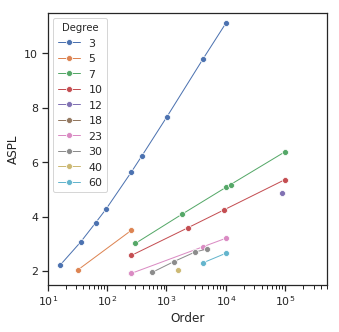

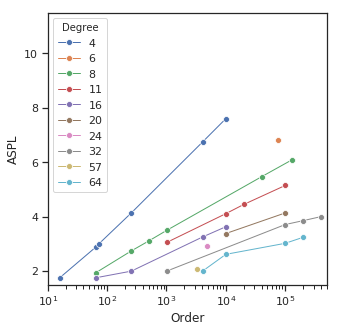

In [32]:
# degrees = [3, 4, 5, 6, 7, 8, 10, 11, 12, 16, 18, 20, 23, 24, 30, 32, 40, 57, 60, 64]
degreess = [[3, 5, 7, 10, 12, 18, 23, 30, 40, 60], [4, 6, 8, 11, 16, 20, 24, 32, 57, 64]]
for j, ds in enumerate(degreess):
    fig, ax = plt.subplots(figsize=(5, 5))
    for i, d in enumerate(ds):
        df = solu_gene[solu_gene['degree'] == d]
        sns.lineplot(data=df, x='order', y='aspl', label=d, marker='o', linewidth=1, err_style=None, ax=ax)
    # ax.legend(title="Degree", loc='center left', bbox_to_anchor=(1, 0.5))
    ax.legend(title="Degree")
    ax.set(xlabel='Order', ylabel='ASPL')
    ax.set(xscale='log', xlim=(10, 500000), ylim=(1.5, 11.5))
    plt.savefig(f"solu_gene{j}.eps")
    plt.show()

# 格子グラフ

In [33]:
solu_grid = solu_join.query("reach != -1")
solu_grid = solu_grid
solu_grid.to_csv("solu_grid.csv")
solu_grid

,key,order,degree,reach,lattice,diam_rand,aspl_rand,diam,aspl,diam_lb,aspl_lb,year
14,n4x4d3r2,16,3,2,"[4, 4, 3, 2]",9,3.833333,3,2.200000,3,2.200000,2017
64,n16x16d3r15,256,3,15,"[16, 16, 3, 15]",13,6.274295,8,5.667249,7,5.588235,2017
67,n16x16d3r4,256,3,4,"[16, 16, 3, 4]",18,7.890993,9,5.753002,7,5.588235,2017
73,n16x16d3r3,256,3,3,"[16, 16, 3, 3]",22,8.584252,10,5.920159,7,5.588235,2017
86,n100x100d3r33,10000,3,33,"[100, 100, 3, 33]",19,11.676544,16,11.249062,12,10.774977,2017
87,n100x100d3r18,10000,3,18,"[100, 100, 3, 18]",26,13.147303,17,11.432421,12,10.774977,2017
93,n100x100d3r6,10000,3,6,"[100, 100, 3, 6]",59,23.753370,33,14.847902,12,10.774977,2017
38,n4x16d4r4,64,4,4,"[4, 16, 4, 4]",8,3.939980,5,2.969742,4,2.857143,2018
77,n4x256d4r24,1024,4,24,"[4, 256, 4, 24]",19,8.020914,11,6.003484,6,5.300098,2018
79,n16x64d4r7,1024,4,7,"[16, 64, 4, 7]",21,8.458341,12,5.950437,6,5.300098,2018


- 合計     40個
- 頂点数   22種類
- 次数     7種類
- 直径     22種類

In [34]:
sorted(solu_grid['degree'].unique())

[3, 4, 6, 9, 15, 28]

## 最適

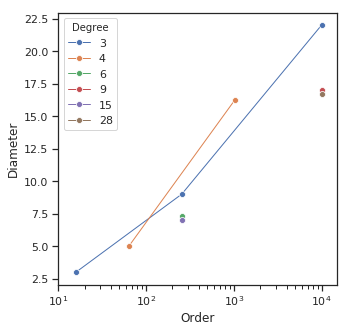

In [35]:
degrees = [3, 4, 6, 9, 15, 28]
fig, ax = plt.subplots(figsize=(5, 5))
for i, d in enumerate(degrees):
    df = solu_grid[solu_grid['degree'] == d]
    sns.lineplot(data=df, x='order', y='diam', label=d, marker='o', linewidth=1, err_style=None, ax=ax)
# ax.legend(title="Degree", loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(title="Degree")
ax.set(xlabel='Order', ylabel='Diameter')
ax.set(xscale='log', xlim=(10, 15000))
plt.savefig(f"solu_grid.eps")
plt.show()

## ランダム